<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 1 - Phase 2 - Andressa

This document aims to compile the subcorpus of human-authored Reddit posts.

## Consolidate the datasets

In [1]:
from pathlib import Path

import pandas as pd

base_dir = Path("../data/ph1")
ndjson_paths = sorted(base_dir.rglob("reddit_submissions.ndjson"))

dfs = []
for p in ndjson_paths:
    df_part = pd.read_json(p, lines=True)
    df_part["source_file"] = str(p)
    dfs.append(df_part)

df_reddit_posts = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

df_reddit_posts


,id,subreddit,created_utc,author,title,selftext,score,num_comments,url,permalink,over_18,removed_by_category,source_file
0,hlunye,LONERSNEEDLOVE,1593984728,juangreen1,Can you loners help me get my followers up,,0,1,https://i.redd.it/pwmy4fggx3951.jpg,https://reddit.com/r/LONERSNEEDLOVE/comments/h...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
1,gdwa47,LONERSNEEDLOVE,1588679278,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
2,fsm60i,LONERSNEEDLOVE,1585691463,noobtwik,Hi,,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/f...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
3,d95gu9,LONERSNEEDLOVE,1569427888,shaikmoin,"22/M , Alone kind off want to make new friends...",,2,1,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/d...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
4,cdw6qk,LONERSNEEDLOVE,1563278938,shaikmoin,22/M loner for sure want to make new friends w...,Available on insta/snapchat/whats app,5,2,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/c...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,7tp59i,unalone,1517192846,mhwbash,Found myself friendless,Recently I've realised I have no friends.\n\nI...,6,5,https://www.reddit.com/r/unalone/comments/7tp5...,https://reddit.com/r/unalone/comments/7tp59i/f...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
5698,7tg2li,unalone,1517091747,None,Unalone 101,.,5,10,https://www.reddit.com/r/unalone/comments/7tg2...,https://reddit.com/r/unalone/comments/7tg2li/u...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
5699,7teuej,unalone,1517080451,DjDrowsyBear,Being Alone in Lonliness,A few years ago I was in the dead middle of a ...,7,12,https://www.reddit.com/r/unalone/comments/7teu...,https://reddit.com/r/unalone/comments/7teuej/b...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
5700,7teblr,unalone,1517075852,None,Inspirational Song,Because songs are all we got.\n\nIrene Cara - ...,3,1,https://www.reddit.com/r/unalone/comments/7teb...,https://reddit.com/r/unalone/comments/7teblr/i...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...


## Drop empty rows in `selftext`

In [2]:
df_reddit_posts = df_reddit_posts.dropna(subset=["selftext"])
df_reddit_posts = df_reddit_posts[df_reddit_posts["selftext"].astype(str).str.strip().ne("")]

df_reddit_posts


,id,subreddit,created_utc,author,title,selftext,score,num_comments,url,permalink,over_18,removed_by_category,source_file
1,gdwa47,LONERSNEEDLOVE,1588679278,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
4,cdw6qk,LONERSNEEDLOVE,1563278938,shaikmoin,22/M loner for sure want to make new friends w...,Available on insta/snapchat/whats app,5,2,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/c...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
5,8vtrjf,LONERSNEEDLOVE,1530636621,SpecyralGoat,Singles day should be a thing,"So i makin it a thing, 2nd of april",3,1,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/8...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
6,54n8m0,LONERSNEEDLOVE,1474927737,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
7,2868tv,LONERSNEEDLOVE,1402797545,Brockiscool,I wonder if anyone will even look at this subr...,Anyone out there\n,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,7tp59i,unalone,1517192846,mhwbash,Found myself friendless,Recently I've realised I have no friends.\n\nI...,6,5,https://www.reddit.com/r/unalone/comments/7tp5...,https://reddit.com/r/unalone/comments/7tp59i/f...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
5698,7tg2li,unalone,1517091747,None,Unalone 101,.,5,10,https://www.reddit.com/r/unalone/comments/7tg2...,https://reddit.com/r/unalone/comments/7tg2li/u...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
5699,7teuej,unalone,1517080451,DjDrowsyBear,Being Alone in Lonliness,A few years ago I was in the dead middle of a ...,7,12,https://www.reddit.com/r/unalone/comments/7teu...,https://reddit.com/r/unalone/comments/7teuej/b...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
5700,7teblr,unalone,1517075852,None,Inspirational Song,Because songs are all we got.\n\nIrene Cara - ...,3,1,https://www.reddit.com/r/unalone/comments/7teb...,https://reddit.com/r/unalone/comments/7teblr/i...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...


## Handle duplicates
Find and display all Reddit posts in `df_reddit_posts` whose `selftext` is duplicated (exact matches), including how many times each duplicated `selftext` occurs and the rows (id/subreddit/author/title/permalink) involved.

In [3]:
# Exact duplicates in selftext (show all duplicated rows + counts)
dupe_mask = df_reddit_posts["selftext"].duplicated(keep=False)
df_selftext_dupes = (
    df_reddit_posts.loc[dupe_mask].copy()
    .assign(selftext_count=lambda d: d.groupby("selftext")["selftext"].transform("size"))
    .sort_values(["selftext_count", "selftext"], ascending=[False, True])
)

print(f"Total rows: {len(df_reddit_posts):,}")
print(f"Rows with duplicated selftext: {len(df_selftext_dupes):,}")
print(f"Distinct duplicated selftext values: {df_selftext_dupes['selftext'].nunique():,}")

df_selftext_dupes[["selftext_count", "id", "subreddit", "author", "title", "permalink", "selftext"]].head(50)

Total rows: 4,485
Rows with duplicated selftext: 51
Distinct duplicated selftext values: 24


,selftext_count,id,subreddit,author,title,permalink,selftext
2306,4,1nawl4n,alone,thatlonelygurl_,What should i do if everybody is against me?,https://reddit.com/r/alone/comments/1nawl4n/wh...,.
4291,4,1qoso82,lonely,Delicious-Radish-708,"When coworkers ask me what did i do yesterday,...",https://reddit.com/r/lonely/comments/1qoso82/w...,.
5691,4,7wgc0a,unalone,None,What's up unaloners?,https://reddit.com/r/unalone/comments/7wgc0a/w...,.
5698,4,7tg2li,unalone,None,Unalone 101,https://reddit.com/r/unalone/comments/7tg2li/u...,.
3680,3,1qytmf2,lonely,AutoModerator,"Weekly Find a Friend thread - February 07, 2026",https://reddit.com/r/lonely/comments/1qytmf2/w...,Here's a template to follow to avoid your comm...
4061,3,1qsim9l,lonely,AutoModerator,"Weekly Find a Friend thread - January 31, 2026",https://reddit.com/r/lonely/comments/1qsim9l/w...,Here's a template to follow to avoid your comm...
4437,3,1qm3a8k,lonely,AutoModerator,"Weekly Find a Friend thread - January 24, 2026",https://reddit.com/r/lonely/comments/1qm3a8k/w...,Here's a template to follow to avoid your comm...
1980,2,1otia6e,alone,None,Longing for vulnerability and connection,https://reddit.com/r/alone/comments/1otia6e/lo...,Am I the only one here who is longing for some...
3434,2,1othped,loneliness,None,"Am I the only one here longing for true, raw v...",https://reddit.com/r/loneliness/comments/1othp...,Am I the only one here who is longing for some...
2466,2,1mh8hfb,alone,Friendship-Bootcamp1,Interested in testing our loneliness and socia...,https://reddit.com/r/alone/comments/1mh8hfb/in...,"Hey everyone,\n\nI’m working with a small team..."


In [4]:
# Drop exact duplicates in `selftext`, keeping the first occurrence
before_rows = len(df_reddit_posts)
before_unique_selftext = df_reddit_posts["selftext"].nunique()

df_reddit_posts = df_reddit_posts.drop_duplicates(subset=["selftext"], keep="first").reset_index(drop=True)

after_rows = len(df_reddit_posts)
after_unique_selftext = df_reddit_posts["selftext"].nunique()

print(f"Rows before: {before_rows:,}")
print(f"Rows after:  {after_rows:,}")
print(f"Removed:     {before_rows - after_rows:,}")
print(f"Unique selftext before: {before_unique_selftext:,}")
print(f"Unique selftext after:  {after_unique_selftext:,}")

df_reddit_posts


Rows before: 4,485
Rows after:  4,458
Removed:     27
Unique selftext before: 4,458
Unique selftext after:  4,458


,id,subreddit,created_utc,author,title,selftext,score,num_comments,url,permalink,over_18,removed_by_category,source_file
0,gdwa47,LONERSNEEDLOVE,1588679278,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
1,cdw6qk,LONERSNEEDLOVE,1563278938,shaikmoin,22/M loner for sure want to make new friends w...,Available on insta/snapchat/whats app,5,2,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/c...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
2,8vtrjf,LONERSNEEDLOVE,1530636621,SpecyralGoat,Singles day should be a thing,"So i makin it a thing, 2nd of april",3,1,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/8...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
3,54n8m0,LONERSNEEDLOVE,1474927737,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
4,2868tv,LONERSNEEDLOVE,1402797545,Brockiscool,I wonder if anyone will even look at this subr...,Anyone out there\n,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,7tzack,unalone,1517296040,okko7,What is something that you think one should do...,What habits should one adapt? What activities ...,2,6,https://www.reddit.com/r/unalone/comments/7tza...,https://reddit.com/r/unalone/comments/7tzack/w...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
4454,7tp59i,unalone,1517192846,mhwbash,Found myself friendless,Recently I've realised I have no friends.\n\nI...,6,5,https://www.reddit.com/r/unalone/comments/7tp5...,https://reddit.com/r/unalone/comments/7tp59i/f...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
4455,7teuej,unalone,1517080451,DjDrowsyBear,Being Alone in Lonliness,A few years ago I was in the dead middle of a ...,7,12,https://www.reddit.com/r/unalone/comments/7teu...,https://reddit.com/r/unalone/comments/7teuej/b...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
4456,7teblr,unalone,1517075852,None,Inspirational Song,Because songs are all we got.\n\nIrene Cara - ...,3,1,https://www.reddit.com/r/unalone/comments/7teb...,https://reddit.com/r/unalone/comments/7teblr/i...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...


### Inspect the dataset
Create a 3-column export from `df_reddit_posts` containing only `id`, `author`, and `selftext`, then write it to an `.xlsx` Excel file (one sheet) for downstream corpus work.

In [5]:
from pathlib import Path

# Select columns to export
df_export = df_reddit_posts.loc[:, ["id", "author", "selftext"]].copy()

# Output path
out_dir = Path("../data/ph2")
out_dir.mkdir(parents=True, exist_ok=True)
excel_path = out_dir / "reddit_posts_id_author_selftext.xlsx"

# Write Excel
df_export.to_excel(excel_path, index=False, sheet_name="posts")

excel_path


PosixPath('../data/ph2/reddit_posts_id_author_selftext.xlsx')

## Identify and remove short posts
Count how many rows in `df_reddit_posts["selftext"]` (non-empty, deduplicated as in the notebook) contain **fewer than 10 words**, and display the count (and share of the dataset).

In [6]:
import re

word_counts = (
    df_reddit_posts["selftext"]
    .astype(str)
    .str.findall(r"\b\w+\b")
    .str.len()
)

n_lt10 = int((word_counts < 10).sum())
n_total = int(len(word_counts))

print(f"Rows with selftext < 10 words: {n_lt10:,}")
print(f"Total rows: {n_total:,}")
print(f"Share: {n_lt10 / n_total:.2%}")


Rows with selftext < 10 words: 219
Total rows: 4,458
Share: 4.91%


In [7]:
# Drop rows where selftext has < 10 words (based on the same tokenization used above)
before_rows = len(df_reddit_posts)

word_counts = (
    df_reddit_posts["selftext"]
    .astype(str)
    .str.findall(r"\b\w+\b")
    .str.len()
)

df_reddit_posts = df_reddit_posts.loc[word_counts >= 10].reset_index(drop=True)

after_rows = len(df_reddit_posts)

print(f"Rows before: {before_rows:,}")
print(f"Rows after:  {after_rows:,}")
print(f"Removed (<10 words): {before_rows - after_rows:,}")

df_reddit_posts

Rows before: 4,458
Rows after:  4,239
Removed (<10 words): 219


,id,subreddit,created_utc,author,title,selftext,score,num_comments,url,permalink,over_18,removed_by_category,source_file
0,gdwa47,LONERSNEEDLOVE,1588679278,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
1,54n8m0,LONERSNEEDLOVE,1474927737,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
2,2867n8,LONERSNEEDLOVE,1402796469,Brockiscool,Welcome,This is my attempt to gather lonely people in ...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,NaN,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...
3,t3ytpc,LonelyAndUnsocialClub,1646107472,crmatter,I'm very lost,I don't really understand how I'm feeling late...,19,3,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,NaN,../data/ph1/new_1000_LonelyAndUnsocialClub_202...
4,t1f369,LonelyAndUnsocialClub,1645824642,BullfrogAble4942,I feel really lonely and have a hard time find...,This is the first time I make a post on Reddit...,14,6,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,NaN,../data/ph1/new_1000_LonelyAndUnsocialClub_202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,7tzack,unalone,1517296040,okko7,What is something that you think one should do...,What habits should one adapt? What activities ...,2,6,https://www.reddit.com/r/unalone/comments/7tza...,https://reddit.com/r/unalone/comments/7tzack/w...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
4235,7tp59i,unalone,1517192846,mhwbash,Found myself friendless,Recently I've realised I have no friends.\n\nI...,6,5,https://www.reddit.com/r/unalone/comments/7tp5...,https://reddit.com/r/unalone/comments/7tp59i/f...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
4236,7teuej,unalone,1517080451,DjDrowsyBear,Being Alone in Lonliness,A few years ago I was in the dead middle of a ...,7,12,https://www.reddit.com/r/unalone/comments/7teu...,https://reddit.com/r/unalone/comments/7teuej/b...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...
4237,7teblr,unalone,1517075852,None,Inspirational Song,Because songs are all we got.\n\nIrene Cara - ...,3,1,https://www.reddit.com/r/unalone/comments/7teb...,https://reddit.com/r/unalone/comments/7teblr/i...,False,NaN,../data/ph1/new_1000_unalone_20260209_184039/r...


In [8]:
# Rebuild the 3-column export after filtering and (optionally) overwrite the Excel file
df_export = df_reddit_posts.loc[:, ["id", "author", "selftext"]].copy()
df_export.to_excel(excel_path, index=False, sheet_name="posts")

print(excel_path)
df_export.head()


../data/ph2/reddit_posts_id_author_selftext.xlsx


,id,author,selftext
0,gdwa47,RedditUser840,Hey just seeing if anyone (ANYONE) would wanna...
1,54n8m0,Living-Ghost,People need to show some love and compassion. ...
2,2867n8,Brockiscool,This is my attempt to gather lonely people in ...
3,t3ytpc,crmatter,I don't really understand how I'm feeling late...
4,t1f369,BullfrogAble4942,This is the first time I make a post on Reddit...


## Inspect a few posts that may not be relevant
From the current cleaned `df_reddit_posts` (non-empty, deduplicated, and filtered to `selftext` with >=10 words), select all rows where `selftext` contains **any** of the whole words `template`, `agenda`, or `discord` (case-insensitive). Display the matching rows, then export them to a single-sheet Excel file.

In [9]:
import re
from pathlib import Path

terms_any = ["template", "agenda", "discord"]
pattern_any = r"(?i)\b(?:%s)\b" % "|".join(map(re.escape, terms_any))

mask_any = df_reddit_posts["selftext"].astype(str).str.contains(pattern_any, regex=True, na=False)

df_selftext_template_agenda_or_discord = (
    df_reddit_posts.loc[mask_any, ["id", "subreddit", "author", "title", "permalink", "selftext"]]
    .copy()
)

df_selftext_template_agenda_or_discord["matched_terms"] = (
    df_selftext_template_agenda_or_discord["selftext"]
    .astype(str)
    .str.findall(pattern_any)
    .apply(lambda xs: sorted({x.lower() for x in xs}))
)

df_selftext_template_agenda_or_discord["selftext_preview"] = (
    df_selftext_template_agenda_or_discord["selftext"]
    .astype(str)
    .str.replace(r"\s+", " ", regex=True)
    .str.slice(0, 300)
)

print(
    f"Matches (any of {terms_any}): {int(mask_any.sum()):,} / {len(df_reddit_posts):,} "
    f"({(mask_any.mean() if len(df_reddit_posts) else 0):.2%})"
)

df_selftext_template_agenda_or_discord[
    ["id", "subreddit", "author", "title", "permalink", "matched_terms", "selftext_preview"]
].sort_values(["subreddit", "id"], ascending=[True, True]).reset_index(drop=True)

Matches (any of ['template', 'agenda', 'discord']): 70 / 4,239 (1.65%)


,id,subreddit,author,title,permalink,matched_terms,selftext_preview
0,i8t9ry,LonelyAndUnsocialClub,Sophisticated_Goat,Discord Server,https://reddit.com/r/LonelyAndUnsocialClub/com...,[discord],"So, as some of you are aware, this subreddit a..."
1,ja5ps6,LonelyAndUnsocialClub,unclevirgin,Introducing myself,https://reddit.com/r/LonelyAndUnsocialClub/com...,[discord],"Hey y'all, My name is Cambria and I'm an 18-ye..."
2,k7n065,LonelyAndUnsocialClub,BonBonYummm,Mental health server!,https://reddit.com/r/LonelyAndUnsocialClub/com...,[discord],The Helping Cherry Tree is a discord server de...
3,hpt2q3,LonelyButLoner,Sophisticated_Goat,Official Discord Server!,https://reddit.com/r/LonelyButLoner/comments/h...,[discord],Join our server! [https://discord.gg/GJhNHEw](...
4,i820ia,LonelyButLoner,Sophisticated_Goat,Are we dying?,https://reddit.com/r/LonelyButLoner/comments/i...,[discord],I've noticed this sub has hardly had any activ...
...,...,...,...,...,...,...,...
65,8u71qr,unalone,okko7,"Next Unalone Hangout: This Saturday, June 30st...",https://reddit.com/r/unalone/comments/8u71qr/n...,[discord],As usual on our discord server: https://discor...
66,8ze7xk,unalone,okko7,About /r/unalone: Current state of the project,https://reddit.com/r/unalone/comments/8ze7xk/a...,[discord],For all those who follow this subreddit and wh...
67,93ny81,unalone,okko7,"Next Unalong hangout: This Saturday, August 4t...",https://reddit.com/r/unalone/comments/93ny81/n...,"[agenda, discord]",Whoever is around: Please join us on our [disc...
68,9c5but,unalone,lordbrottor20,New member,https://reddit.com/r/unalone/comments/9c5but/n...,[discord],I was on the lonely subreddit and posted about...


In [10]:
out_dir = Path("../data/ph2")
out_dir.mkdir(parents=True, exist_ok=True)

excel_path_any = out_dir / "reddit_posts_selftext_template_agenda_or_discord.xlsx"

df_selftext_template_agenda_or_discord.to_excel(
    excel_path_any,
    index=False,
    sheet_name="matches_any",
)

excel_path_any


PosixPath('../data/ph2/reddit_posts_selftext_template_agenda_or_discord.xlsx')

### Drop selected posts identified as irrelevant
From the current cleaned `df_reddit_posts`, remove (drop) any rows whose `id` is in the provided list of IDs. Report how many of those IDs were found/removed and show the removed rows (key columns) for verification.

In [11]:
ids_to_drop = [
    "hpt2q3",
    "9h8hxs",
    "8u71qr",
    "8t3mq9",
    "8np06p",
    "8lgy70",
    "8gr5d5",
    "8feqcw",
    "8e5lpr",
    "8dcog9",
    "cog6i7"
]

mask_drop = df_reddit_posts["id"].astype(str).isin(ids_to_drop)

df_dropped_rows_preview = (
    df_reddit_posts.loc[mask_drop, ["id", "subreddit", "author", "title", "permalink"]]
    .copy()
    .sort_values(["subreddit", "id"])
    .reset_index(drop=True)
)

print(f"Rows before: {len(df_reddit_posts):,}")
print(f"Requested IDs to drop: {len(ids_to_drop):,}")
print(f"Found in df_reddit_posts: {int(mask_drop.sum()):,}")
print(f"Missing (not found): {len(set(ids_to_drop) - set(df_reddit_posts['id'].astype(str))):,}")

df_reddit_posts = df_reddit_posts.loc[~mask_drop].reset_index(drop=True)

print(f"Rows after:  {len(df_reddit_posts):,}")

df_dropped_rows_preview

Rows before: 4,239
Requested IDs to drop: 11
Found in df_reddit_posts: 11
Missing (not found): 0
Rows after:  4,228


,id,subreddit,author,title,permalink
0,hpt2q3,LonelyButLoner,Sophisticated_Goat,Official Discord Server!,https://reddit.com/r/LonelyButLoner/comments/h...
1,cog6i7,loner,None,Check this out if you feel alone,https://reddit.com/r/loner/comments/cog6i7/che...
2,8dcog9,unalone,okko7,Unalone hackathon: Next meetup: Saturday at 10...,https://reddit.com/r/unalone/comments/8dcog9/u...
3,8e5lpr,unalone,okko7,Unalone hackathon: Next meetup: Saturday Augus...,https://reddit.com/r/unalone/comments/8e5lpr/u...
4,8feqcw,unalone,okko7,Reminder: Unalone hackathon: Next online meetu...,https://reddit.com/r/unalone/comments/8feqcw/r...
5,8gr5d5,unalone,okko7,Reminder: Next hangout re hackathon/anonymous ...,https://reddit.com/r/unalone/comments/8gr5d5/r...
6,8lgy70,unalone,okko7,"Next Hangout: Sunday, May 27th, 10am CST, 11am...",https://reddit.com/r/unalone/comments/8lgy70/n...
7,8np06p,unalone,whoopsapocalypse,"Next Hangout: Saturday, June 2nd at 11 AM CST,...",https://reddit.com/r/unalone/comments/8np06p/n...
8,8t3mq9,unalone,whoopsapocalypse,"Next Unalone Hangout: This Saturday, June 23rd...",https://reddit.com/r/unalone/comments/8t3mq9/n...
9,8u71qr,unalone,okko7,"Next Unalone Hangout: This Saturday, June 30st...",https://reddit.com/r/unalone/comments/8u71qr/n...


In [12]:
# Rebuild the 3-column export after dropping the specified IDs (overwrites the same Excel file)
df_export = df_reddit_posts.loc[:, ["id", "author", "selftext"]].copy()
df_export.to_excel(excel_path, index=False, sheet_name="posts")

print(excel_path)
df_export.head()


../data/ph2/reddit_posts_id_author_selftext.xlsx


,id,author,selftext
0,gdwa47,RedditUser840,Hey just seeing if anyone (ANYONE) would wanna...
1,54n8m0,Living-Ghost,People need to show some love and compassion. ...
2,2867n8,Brockiscool,This is my attempt to gather lonely people in ...
3,t3ytpc,crmatter,I don't really understand how I'm feeling late...
4,t1f369,BullfrogAble4942,This is the first time I make a post on Reddit...


## Detect language of `selftext` and add `language` column

Add automatic language identification for each row in `df_reddit_posts["selftext"]`, store the predicted ISO 639-1 code in a new column `language`, and display a quick frequency table (optionally updating the Excel export to include this new column).

In [13]:
# Install language detector (if needed) + import
try:
    from langdetect import detect
    from langdetect.lang_detect_exception import LangDetectException
except Exception:
    !pip -q install langdetect
    from langdetect import detect
    from langdetect.lang_detect_exception import LangDetectException

In [14]:
import re
import pandas as pd


def _detect_language(text: str) -> str:
    if text is None:
        return "unknown"
    s = str(text).strip()
    if not s:
        return "unknown"
    s = re.sub(r"\s+", " ", s)
    try:
        return detect(s)
    except LangDetectException:
        return "unknown"
    except Exception:
        return "unknown"


df_reddit_posts["language"] = df_reddit_posts["selftext"].map(_detect_language)

df_reddit_posts[["id", "subreddit", "author", "language", "selftext"]].head()

,id,subreddit,author,language,selftext
0,gdwa47,LONERSNEEDLOVE,RedditUser840,en,Hey just seeing if anyone (ANYONE) would wanna...
1,54n8m0,LONERSNEEDLOVE,Living-Ghost,en,People need to show some love and compassion. ...
2,2867n8,LONERSNEEDLOVE,Brockiscool,en,This is my attempt to gather lonely people in ...
3,t3ytpc,LonelyAndUnsocialClub,crmatter,en,I don't really understand how I'm feeling late...
4,t1f369,LonelyAndUnsocialClub,BullfrogAble4942,en,This is the first time I make a post on Reddit...


In [15]:
# Quick inspection: language distribution
lang_counts = (
    df_reddit_posts["language"]
    .fillna("unknown")
    .value_counts(dropna=False)
    .rename_axis("language")
    .reset_index(name="n")
)
lang_counts["share"] = lang_counts["n"] / len(df_reddit_posts)

lang_counts.head(30)


,language,n,share
0,en,4193,0.991722
1,fr,14,0.003311
2,ru,5,0.001183
3,es,2,0.000473
4,tl,2,0.000473
5,af,2,0.000473
6,da,1,0.000237
7,no,1,0.000237
8,ar,1,0.000237
9,zh-cn,1,0.000237


### Filter and display all rows in `df_reddit_posts` where language is NOT English ('en')

In [16]:
mask_non_english = df_reddit_posts["language"].fillna("unknown").ne("en")

print(f"Non-English rows: {int(mask_non_english.sum()):,} / {len(df_reddit_posts):,} ({mask_non_english.mean():.2%})")

df_reddit_posts_non_english = (
    df_reddit_posts.loc[mask_non_english, ["id", "subreddit", "author", "title", "permalink", "language", "selftext"]]
    .copy()
    .assign(selftext_preview=lambda d: d["selftext"].astype(str).str.replace(r"\s+", " ", regex=True).str.slice(0, 400))
    .sort_values(["language", "subreddit", "id"], ascending=[True, True, True])
    .reset_index(drop=True)
)

df_reddit_posts_non_english[["id", "subreddit", "author", "title", "permalink", "language", "selftext_preview"]]


Non-English rows: 35 / 4,228 (0.83%)


,id,subreddit,author,title,permalink,language,selftext_preview
0,5iv8hx,Loners,Qaheera,Barely breathing,https://reddit.com/r/Loners/comments/5iv8hx/ba...,af,"I'll die if I let you kiss me, and I'll die if..."
1,1ignyup,SelfHate,None,I'm both a pig and a monkey,https://reddit.com/r/SelfHate/comments/1ignyup...,af,I'm fucking disgusting I hope I'll die soon
2,1okuewf,SelfHate,eaop1,هل انا اكره نفسي,https://reddit.com/r/SelfHate/comments/1okuewf...,ar,بدايتا انا ما اريد الاتنشن او الاهتمام منكم بس...
3,1p1ercu,SelfHate,Far_Stranger_279,im a shitty person,https://reddit.com/r/SelfHate/comments/1p1ercu...,da,i dont deserve to be loved i deserve to die i ...
4,1mzulw2,alone,TrainerAgreeable4602,WPlace and my Flag,https://reddit.com/r/alone/comments/1mzulw2/wp...,de,"Ich sitze vor meinem Bildschirm, Herz klopft e..."
5,1nctjjd,alone,ABNERDARK,Salí de mi cueva después de un tiempo..,https://reddit.com/r/alone/comments/1nctjjd/sa...,es,Luego de una ruptura estuve un tiempo aislado ...
6,1ql31uw,alone,JOSUEGIM,Un poema,https://reddit.com/r/alone/comments/1ql31uw/un...,es,Todos corren hacia algo. Uno quiere ser nombre...
7,1q2ckdy,alone,positive-banana-,Je n’ai rien,https://reddit.com/r/alone/comments/1q2ckdy/je...,fr,Je suis dans une situation horrible depuis que...
8,1qdetpo,alone,ImaginationIcy4521,J’en peut plus …,https://reddit.com/r/alone/comments/1qdetpo/je...,fr,Cela fait des mois que je tire sur la corde . ...
9,1qn0wdn,alone,Shadow_s75,Quand ni la famille ni la société ne sont gara...,https://reddit.com/r/alone/comments/1qn0wdn/qu...,fr,Ma souffrance ne vient pas d’un seul endroit E...


## Keep only English (`language == 'en'`) posts, except keep these non-English IDs
Drop all rows where `language` is not `'en'`, **except** keep rows whose `id` is one of: `5iv8hx`, `1ignyup`, `1p1ercu`.

In [17]:
ids_keep_non_english = ["5iv8hx", "1ignyup", "1p1ercu"]

before_rows = len(df_reddit_posts)

mask_is_en = df_reddit_posts["language"].fillna("unknown").eq("en")
mask_keep_exception = df_reddit_posts["id"].astype(str).isin(ids_keep_non_english)

mask_drop = (~mask_is_en) & (~mask_keep_exception)

df_dropped_non_english_preview = (
    df_reddit_posts.loc[mask_drop, ["id", "subreddit", "author", "title", "permalink", "language"]]
    .copy()
    .sort_values(["language", "subreddit", "id"])
    .reset_index(drop=True)
)

df_reddit_posts = df_reddit_posts.loc[~mask_drop].reset_index(drop=True)

after_rows = len(df_reddit_posts)

print(f"Rows before: {before_rows:,}")
print(f"Dropped (non-English, not in exceptions): {int(mask_drop.sum()):,}")
print(f"Kept exceptions (regardless of language): {int(mask_keep_exception.sum()):,}")
print(f"Rows after:  {after_rows:,}")

df_dropped_non_english_preview

Rows before: 4,228
Dropped (non-English, not in exceptions): 32
Kept exceptions (regardless of language): 3
Rows after:  4,196


,id,subreddit,author,title,permalink,language
0,1okuewf,SelfHate,eaop1,هل انا اكره نفسي,https://reddit.com/r/SelfHate/comments/1okuewf...,ar
1,1mzulw2,alone,TrainerAgreeable4602,WPlace and my Flag,https://reddit.com/r/alone/comments/1mzulw2/wp...,de
2,1nctjjd,alone,ABNERDARK,Salí de mi cueva después de un tiempo..,https://reddit.com/r/alone/comments/1nctjjd/sa...,es
3,1ql31uw,alone,JOSUEGIM,Un poema,https://reddit.com/r/alone/comments/1ql31uw/un...,es
4,1q2ckdy,alone,positive-banana-,Je n’ai rien,https://reddit.com/r/alone/comments/1q2ckdy/je...,fr
5,1qdetpo,alone,ImaginationIcy4521,J’en peut plus …,https://reddit.com/r/alone/comments/1qdetpo/je...,fr
6,1qn0wdn,alone,Shadow_s75,Quand ni la famille ni la société ne sont gara...,https://reddit.com/r/alone/comments/1qn0wdn/qu...,fr
7,15oupnv,solitude,ladyboysarenice,Comment s amuser seul dans sa chambre,https://reddit.com/r/solitude/comments/15oupnv...,fr
8,1612g7a,solitude,None,Solitude dans la colocation,https://reddit.com/r/solitude/comments/1612g7a...,fr
9,1625vjk,solitude,None,Solitude,https://reddit.com/r/solitude/comments/1625vjk...,fr


In [18]:
# Optional: overwrite Excel export with the filtered dataset (including language)
df_export = df_reddit_posts.loc[:, ["id", "author", "language", "selftext"]].copy()
df_export.to_excel(excel_path, index=False, sheet_name="posts")

print(excel_path)
df_export.head()


../data/ph2/reddit_posts_id_author_selftext.xlsx


,id,author,language,selftext
0,gdwa47,RedditUser840,en,Hey just seeing if anyone (ANYONE) would wanna...
1,54n8m0,Living-Ghost,en,People need to show some love and compassion. ...
2,2867n8,Brockiscool,en,This is my attempt to gather lonely people in ...
3,t3ytpc,crmatter,en,I don't really understand how I'm feeling late...
4,t1f369,BullfrogAble4942,en,This is the first time I make a post on Reddit...


### Inspect the post `1mhi3q7`
Filter the current cleaned `df_reddit_posts` and display the row(s) where `id == "1mhi3q7"`.

In [19]:
target_id = "1mhi3q7"

row = df_reddit_posts.loc[df_reddit_posts["id"].astype(str).eq(target_id)].copy()

print(f"Matches for id={target_id}: {len(row)}")
row


Matches for id=1mhi3q7: 1


,id,subreddit,created_utc,author,title,selftext,score,num_comments,url,permalink,over_18,removed_by_category,source_file,language
670,1mhi3q7,SelfHate,1754324727,MYNAMEISNTGONE,اريد دادي يدرسني,ضوجة\n\nI need a daddy to help me with my stud...,1,5,https://www.reddit.com/r/SelfHate/comments/1mh...,https://reddit.com/r/SelfHate/comments/1mhi3q7...,False,None,../data/ph1/new_1000_SelfHate_20260209_183808/...,en


## Export the current cleaned `df_reddit_posts` to two files
Write the full `df_reddit_posts` DataFrame as:
1) newline-delimited JSON: `../data/ph2/human_reddit_posts.ndjson` (records, one JSON per line)  
2) Excel: `../data/ph2/human_reddit_posts.xlsx` (single sheet)

In [20]:
from pathlib import Path

out_dir = Path("../data/ph2")
out_dir.mkdir(parents=True, exist_ok=True)

ndjson_path = out_dir / "human_reddit_posts.ndjson"
xlsx_path = out_dir / "human_reddit_posts.xlsx"

df_reddit_posts.to_json(
    ndjson_path,
    orient="records",
    lines=True,
    force_ascii=False,
    date_format="iso",
)

df_reddit_posts.to_excel(
    xlsx_path,
    index=False,
    sheet_name="posts",
)

print(ndjson_path)
print(xlsx_path)
print(f"Rows exported: {len(df_reddit_posts):,} | Columns: {df_reddit_posts.shape[1]:,}")


../data/ph2/human_reddit_posts.ndjson
../data/ph2/human_reddit_posts.xlsx
Rows exported: 4,196 | Columns: 14


## Load the `human_reddit_posts` DataFrame from newline-delimited JSON file
Load the newline-delimited JSON file `../data/ph2/human_reddit_posts.ndjson` (one JSON object per line) into a new pandas DataFrame named `df_human_reddit_posts`, and display basic sanity checks (shape, columns, head).

In [1]:
from pathlib import Path
import pandas as pd

human_ndjson_path = Path("../data/ph2/human_reddit_posts.ndjson")

df_human_reddit_posts = pd.read_json(human_ndjson_path, lines=True)

print(human_ndjson_path)
print(f"Rows: {len(df_human_reddit_posts):,} | Columns: {df_human_reddit_posts.shape[1]:,}")
display(df_human_reddit_posts.dtypes)
df_human_reddit_posts.head()


../data/ph2/human_reddit_posts.ndjson
Rows: 4,196 | Columns: 14


id                     object
subreddit              object
created_utc             int64
author                 object
title                  object
selftext               object
score                   int64
num_comments            int64
url                    object
permalink              object
over_18                  bool
removed_by_category    object
source_file            object
language               object
dtype: object

,id,subreddit,created_utc,author,title,selftext,score,num_comments,url,permalink,over_18,removed_by_category,source_file,language
0,gdwa47,LONERSNEEDLOVE,1588679278,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
1,54n8m0,LONERSNEEDLOVE,1474927737,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
2,2867n8,LONERSNEEDLOVE,1402796469,Brockiscool,Welcome,This is my attempt to gather lonely people in ...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
3,t3ytpc,LonelyAndUnsocialClub,1646107472,crmatter,I'm very lost,I don't really understand how I'm feeling late...,19,3,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
4,t1f369,LonelyAndUnsocialClub,1645824642,BullfrogAble4942,I feel really lonely and have a hard time find...,This is the first time I make a post on Reddit...,14,6,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en


## Handle near-duplicates

### Near-duplicate detection for templates (char n‑gram TF–IDF + global similarity search)

In [2]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def normalize_for_templates(s: str, *, strip_numbers: bool = False) -> str:
    """Normalization tuned for copy-paste templates with small variable fields."""
    s = "" if s is None else str(s)

    s = s.lower()

    # Remove URLs (often vary but don't change the template)
    s = re.sub(r"(https?://\S+|www\.\S+)", " URL ", s)

    # Normalize line breaks / whitespace
    s = re.sub(r"\s+", " ", s).strip()

    # Optional: replace numbers (ages, dates, phone numbers) with a placeholder
    # Turn on if your templates differ mainly in numeric fields.
    if strip_numbers:
        s = re.sub(r"\d+", " NUM ", s)

    # Normalize repeated punctuation (optional, but helps)
    s = re.sub(r"([!?.,])\1+", r"\1", s)

    return s


def find_template_like_pairs(
    df: pd.DataFrame,
    text_col: str = "selftext",
    id_col: str = "id",
    threshold: float = 0.90,
    strip_numbers: bool = True,
    length_bin_words: int = 60,
    bin_fuzz: int = 1,           # compare within bin and its neighbors
    ngram_range: tuple[int, int] = (4, 6),
    min_df: int = 2,
) -> pd.DataFrame:
    d = df[[id_col, text_col]].copy()
    d["text_norm"] = d[text_col].map(lambda x: normalize_for_templates(x, strip_numbers=strip_numbers))
    d["n_words"] = d["text_norm"].str.findall(r"\b\w+\b").str.len()

    # Blocking by length to cut comparisons (templates are usually similar length)
    d["len_bin"] = (d["n_words"] // length_bin_words).astype(int)

    pairs = []

    # We will compare each bin with itself and neighboring bins (to avoid boundary misses)
    bins = sorted(d["len_bin"].unique().tolist())
    bin_to_idx = {b: i for i, b in enumerate(bins)}

    for b in bins:
        # collect candidate rows: bin b plus neighbors
        neighbor_bins = [b + delta for delta in range(-bin_fuzz, bin_fuzz + 1)]
        sub = d[d["len_bin"].isin(neighbor_bins)].copy()
        if len(sub) < 2:
            continue

        # Build vector space for this candidate pool
        vec = TfidfVectorizer(
            analyzer="char_wb",
            ngram_range=ngram_range,
            min_df=min_df,
        )
        X = vec.fit_transform(sub["text_norm"])

        # Cosine similarity matrix
        S = cosine_similarity(X, dense_output=False).tocoo()

        # Only keep pairs where BOTH are in the central bin b
        # (prevents duplicates from being reported multiple times across neighbor comparisons)
        in_central = sub["len_bin"].to_numpy() == b

        for i, j, sim in zip(S.row, S.col, S.data):
            if i >= j:
                continue
            if sim < threshold:
                continue
            if not (in_central[i] and in_central[j]):
                continue

            pairs.append({
                f"{id_col}_a": sub.iloc[i][id_col],
                f"{id_col}_b": sub.iloc[j][id_col],
                "cosine": float(sim),
                "words_a": int(sub.iloc[i]["n_words"]),
                "words_b": int(sub.iloc[j]["n_words"]),
            })

    out = pd.DataFrame(pairs)
    if out.empty:
        return out

    return out.sort_values("cosine", ascending=False).reset_index(drop=True)


Calibrate thresholds

Threshold guidance (for templates)
- Start with `threshold=0.92` if you want high precision (fewer false positives).
- Use `0.88–0.90` if you want higher recall (catch more template variants).
- Because you’re stripping numbers, similarities often jump up; you may be able to keep the threshold a bit higher.

In [22]:
pairs = find_template_like_pairs(
    df_human_reddit_posts,
    threshold=0.92,        # good starting point for template detection
    strip_numbers=True,    # recommended for "same skeleton, fields changed"
)
pairs

,id_a,id_b,cosine,words_a,words_b
0,1hxfojt,1gzq3e1,1.000000,295,295
1,1qu7sah,1qte5fg,1.000000,102,102
2,mxd96w,m8tnho,1.000000,35,35
3,ugfpw7,ugedga,1.000000,17,17
4,1prw97o,1prwbfn,1.000000,335,335
5,qxxtt8,qxxp76,1.000000,45,45
6,1qvki03,1qvkjkt,1.000000,74,74
7,1k9nfiu,1k4d0so,1.000000,58,58
8,1qrecbn,1qqun04,1.000000,95,95
9,1paqmae,1paqqnv,1.000000,116,116


Turn pairs into “template families” (clusters)

In [23]:
def cluster_pairs_union_find(pairs: pd.DataFrame, id_a: str = "id_a", id_b: str = "id_b") -> dict[str, int]:
    parent = {}

    def find(x):
        parent.setdefault(x, x)
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    def union(x, y):
        rx, ry = find(x), find(y)
        if rx != ry:
            parent[ry] = rx

    for a, b in pairs[[id_a, id_b]].itertuples(index=False):
        union(str(a), str(b))

    # compress + assign group ids
    roots = {}
    group_id = 0
    out = {}
    for x in parent:
        r = find(x)
        if r not in roots:
            roots[r] = group_id
            group_id += 1
        out[x] = roots[r]
    return out


# Example: add a template_group column for items that appear in any near-dup cluster
if not pairs.empty:
    mapping = cluster_pairs_union_find(pairs, id_a="id_a", id_b="id_b")
    df_templates = df_human_reddit_posts.copy()
    df_templates["template_group"] = df_templates["id"].astype(str).map(mapping)

    # Inspect biggest groups
    group_sizes = (
        df_templates.dropna(subset=["template_group"])
        .groupby("template_group")["id"]
        .size()
        .sort_values(ascending=False)
        .rename("n")
        .reset_index()
    )


In [24]:
group_sizes

,template_group,n
0,7.0,3
1,0.0,2
2,1.0,2
3,2.0,2
4,4.0,2
5,3.0,2
6,5.0,2
7,6.0,2
8,8.0,2
9,9.0,2


Review groups

In [42]:
g = int(group_sizes.iloc[0]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
158,1k9nfiu,LonelyTogether,Neo-Phyxius,Emotional Support,"I used to have this friend, who was a girl, an..."
160,1k4d0so,LonelyTogether,Neo_Phyxius,Emotional Support,"\nI used to have this friend, who was a girl, ..."
162,1jvkiz0,LonelyTogether,Neo-Phyxius,Emotional Support,"I used to have this friend, who was a girl, an..."


In [43]:
g = int(group_sizes.iloc[1]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
958,1hxfojt,SelfHate,BookkeeperNational39,Survey about online and offline behaviors (18y...,Hi Everybody!\n\nThe Psychopathology Lab at Th...
1022,1gzq3e1,SelfHate,BookkeeperNational39,SURVEY: Take survey about ONLINE and OFFLINE B...,Hi Everybody!\n\nThe Psychopathology Lab at Th...


In [26]:
g = int(group_sizes.iloc[2]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
2022,1qu7sah,loneliness,chusaychusay,I feel lonely because relationships/friendship...,I feel thats the main obstacle. I have no prob...
3115,1qte5fg,lonely,chusaychusay,I feel lonely because relationships/friendship...,I feel thats the main obstacle. I have no prob...


In [27]:
g = int(group_sizes.iloc[3]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
15,mxd96w,LonelyAndUnsocialClub,Dull-Sail3428,Helping a 14m friend make new friends,\nLooking for anyone near his age to learn to ...
19,m8tnho,LonelyAndUnsocialClub,Dull-Sail3428,Helping a 14m friend make more friends,Looking for anyone near his age to learn to ta...


In [28]:
g = int(group_sizes.iloc[4]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
1400,1prw97o,alone,TemporaryTackle3240,loneliness,I have spent the last month inside my room (li...
2350,1prwbfn,loneliness,TemporaryTackle3240,Alone,I have spent the last month inside my room (li...


In [29]:
g = int(group_sizes.iloc[5]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
3703,ugfpw7,loner,Master_Bruno_1084,"""The universe makes a sound — is a sound. In t...",It can watch other flowers grow and become w...
4070,ugedga,solitude,Master_Bruno_1084,"""The universe makes a sound — is a sound. In t...",It can watch other flowers grow and become wh...


In [30]:
g = int(group_sizes.iloc[6]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
3747,qxxtt8,loner,Master_Bruno_1084,"""What is necessary, after all, is only this: s...",To be solitary as you were when you were a chi...
4083,qxxp76,solitude,Master_Bruno_1084,"""What is necessary, after all, is only this: s...",To be solitary as you were when you were a chi...


In [31]:
g = int(group_sizes.iloc[7]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
2011,1qvki03,loneliness,Alternative-Goal-910,I want to be a person of a shadow,I’m always the last person invited. I’m always...
2980,1qvkjkt,lonely,Alternative-Goal-910,I’m a shadow,I’m always the last person invited. I’m always...


In [32]:
g = int(group_sizes.iloc[8]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
3249,1qrecbn,lonely,Whole_Intention_7949,How many of you have always felt a bit lonely ...,I cut off both my friends a few days ago due t...
3283,1qqun04,lonely,Whole_Intention_7949,Has anyone just...... always felt lonely even ...,I cut off both my friends a few days ago due t...


In [33]:
g = int(group_sizes.iloc[9]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
2476,1paqmae,loneliness,JPPerdomoOfficial,Feeling lonely this holiday season? Here’s how...,Have the holidays been feeling heavier than us...
3658,1paqqnv,lonely_advice,JPPerdomoOfficial,Feeling lonely this holiday season? Here’s how...,Have the holidays been feeling heavier than us...


In [34]:
g = int(group_sizes.iloc[10]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
677,1mdpdon,SelfHate,Most-Switch8758,"Too untalented to follow my dreams, too stupid...",st failed about everything I’ve set out to do ...
678,1mdpciu,SelfHate,Most-Switch8758,"Too untalented to follow my dreams, too stupid...",I just failed about everything I’ve set out to...


In [35]:
g = int(group_sizes.iloc[11]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
115,1qsds0q,LonelyTogether,AdSimple2026,Just a vent,Vent I guess\n\nI'm just so tired of feeling l...
2036,1qsap9f,loneliness,AdSimple2026,Vent I guess,I'm just so tired of feeling like I have no on...


In [36]:
g = int(group_sizes.iloc[12]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
1571,1oo188n,alone,EveryFennel4202,20F having bad luck with making friends,Please read first if you’re going to judge or ...
2647,1oo137b,loneliness,EveryFennel4202,20F Having bad luck finding new friends,I have trauma with women as every girl but one...


In [37]:
g = int(group_sizes.iloc[13]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
472,1p0wxz6,SelfHate,TheSilencer1998,"I lost my closest friend, and I don't blame an...","For context, no, they ain't dead thankfully. B..."
1513,1p1z7ev,alone,TheSilencer1998,"I lost my closest friend, and I feel more alon...","For context, no, they ain't dead thankfully. B..."


In [38]:
g = int(group_sizes.iloc[14]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
17,mha3qs,LonelyAndUnsocialClub,mrchefey2,[survay] Perceptions of companion animals affe...,"&#x200B;\n\nHi,\n\nI am a final year student c..."
4112,m8khzy,solitude,mrchefey2,Companion animals Online Survey | Qualtrics Su...,"Hi,\n\nI am a final year student conducting re..."


In [39]:
g = int(group_sizes.iloc[15]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
111,1qy9iqe,LonelyTogether,SubstantialShroom,What to do when the silence gets to much?,"TW: SH, hospitals,\n.\n.\n.\nI was released fr..."
2830,1qybylp,lonely,SubstantialShroom,How to deal with loneliness when it feels so h...,"TW: SH, hospitals,\n.\n.\n.\nI was released fr..."


In [40]:
g = int(group_sizes.iloc[16]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
4102,nneswe,solitude,Master_Bruno_1084,"""Solitude and silence can never be separated f...",The Desert Fathers did not think of solitude a...
4131,gt9bpv,solitude,Master_Bruno_1084,"""Solitude and silence can never be separated f...",...But solitude and silence are for prayer. Th...


In [41]:
g = int(group_sizes.iloc[17]["template_group"])
df_templates.loc[df_templates["template_group"].eq(g), ["id", "subreddit", "author", "title", "selftext"]].head(10)

,id,subreddit,author,title,selftext
4099,o46n7w,solitude,Master_Bruno_1084,"""If you would ask the Desert Fathers why solit...",At first this answer seems quite disturbing to...
4128,hch8hu,solitude,Master_Bruno_1084,"""If you would ask the Desert Fathers [and Moth...",...But when we give it a closer look we can se...


### Keep one representative per group (earliest), drop the rest

In [44]:
df_tmp = df_templates.copy()

# Keep all non-clustered rows + the earliest in each clustered group
clustered = df_tmp.dropna(subset=["template_group"]).copy()
not_clustered = df_tmp[df_tmp["template_group"].isna()].copy()

keep_clustered = (
    clustered.sort_values("created_utc")
    .drop_duplicates(subset=["template_group"], keep="first")
)

df_dedup_templates = pd.concat([not_clustered, keep_clustered], ignore_index=True)
df_dedup_templates = df_dedup_templates.drop(columns=["template_group"])

len(df_tmp), len(df_dedup_templates)

(4196, 4177)

In [45]:
df_human_reddit_posts_2 = df_dedup_templates.copy()

### Export the current cleaned `df_human_reddit_posts_2` to two files
Write the full `df_reddit_posts` DataFrame as:
1) newline-delimited JSON: `../data/ph2/human_reddit_posts_2.ndjson` (records, one JSON per line)
2) Excel: `../data/ph2/human_reddit_posts_2.xlsx` (single sheet)

In [46]:
from pathlib import Path

out_dir = Path("../data/ph2")
out_dir.mkdir(parents=True, exist_ok=True)

ndjson_path = out_dir / "human_reddit_posts_2.ndjson"
xlsx_path = out_dir / "human_reddit_posts_2.xlsx"

df_human_reddit_posts_2.to_json(
    ndjson_path,
    orient="records",
    lines=True,
    force_ascii=False,
    date_format="iso",
)

df_human_reddit_posts_2.to_excel(
    xlsx_path,
    index=False,
    sheet_name="posts",
)

print(ndjson_path)
print(xlsx_path)
print(f"Rows exported: {len(df_human_reddit_posts_2):,} | Columns: {df_human_reddit_posts_2.shape[1]:,}")


../data/ph2/human_reddit_posts_2.ndjson
../data/ph2/human_reddit_posts_2.xlsx
Rows exported: 4,177 | Columns: 14


## Create the `created_utc_datetime` column
Create `created_utc_datetime` from `created_utc` (Unix seconds, UTC) in `df_human_reddit_posts`, and reorder columns so the new column appears immediately to the right of `created_utc`.

In [47]:
import pandas as pd

dt_col = "created_utc_datetime"

df_human_reddit_posts_2[dt_col] = pd.to_datetime(
    df_human_reddit_posts_2["created_utc"],
    unit="s",
    utc=True,
    errors="coerce",
)

cols = df_human_reddit_posts_2.columns.tolist()
if dt_col in cols:
    cols.remove(dt_col)

created_pos = cols.index("created_utc")
cols = cols[: created_pos + 1] + [dt_col] + cols[created_pos + 1:]

df_human_reddit_posts_2 = df_human_reddit_posts_2.loc[:, cols]

#display(df_human_reddit_posts_2[["created_utc", "created_utc_datetime"]].head())
#display(df_human_reddit_posts_2.dtypes)

df_human_reddit_posts_2

,id,subreddit,created_utc,created_utc_datetime,author,title,selftext,score,num_comments,url,permalink,over_18,removed_by_category,source_file,language
0,gdwa47,LONERSNEEDLOVE,1588679278,2020-05-05 11:47:58+00:00,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
1,54n8m0,LONERSNEEDLOVE,1474927737,2016-09-26 22:08:57+00:00,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
2,2867n8,LONERSNEEDLOVE,1402796469,2014-06-15 01:41:09+00:00,Brockiscool,Welcome,This is my attempt to gather lonely people in ...,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
3,t3ytpc,LonelyAndUnsocialClub,1646107472,2022-03-01 04:04:32+00:00,crmatter,I'm very lost,I don't really understand how I'm feeling late...,19,3,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
4,t1f369,LonelyAndUnsocialClub,1645824642,2022-02-25 21:30:42+00:00,BullfrogAble4942,I feel really lonely and have a hard time find...,This is the first time I make a post on Reddit...,14,6,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,1qqun04,lonely,1769744772,2026-01-30 03:46:12+00:00,Whole_Intention_7949,Has anyone just...... always felt lonely even ...,I cut off both my friends a few days ago due t...,3,1,https://www.reddit.com/r/lonely/comments/1qqun...,https://reddit.com/r/lonely/comments/1qqun04/h...,False,None,../data/ph1/new_1000_lonely_20260209_183936/ra...,en
4173,1qsap9f,loneliness,1769885436,2026-01-31 18:50:36+00:00,AdSimple2026,Vent I guess,I'm just so tired of feeling like I have no on...,1,5,https://www.reddit.com/r/loneliness/comments/1...,https://reddit.com/r/loneliness/comments/1qsap...,False,None,../data/ph1/new_1000_loneliness_20260209_18385...,en
4174,1qte5fg,lonely,1769987793,2026-02-01 23:16:33+00:00,chusaychusay,I feel lonely because relationships/friendship...,I feel thats the main obstacle. I have no prob...,4,1,https://www.reddit.com/r/lonely/comments/1qte5...,https://reddit.com/r/lonely/comments/1qte5fg/i...,False,None,../data/ph1/new_1000_lonely_20260209_183936/ra...,en
4175,1qvki03,loneliness,1770198925,2026-02-04 09:55:25+00:00,Alternative-Goal-910,I want to be a person of a shadow,I’m always the last person invited. I’m always...,0,2,https://www.reddit.com/r/loneliness/comments/1...,https://reddit.com/r/loneliness/comments/1qvki...,False,None,../data/ph1/new_1000_loneliness_20260209_18385...,en


## Create the `selftext_word_count` column

In [48]:
import re

wc_col = "selftext_word_count"

df_human_reddit_posts_2[wc_col] = (
    df_human_reddit_posts_2["selftext"]
    .astype(str)
    .str.findall(r"\b\w+\b")
    .str.len()
)

cols = df_human_reddit_posts_2.columns.tolist()
if wc_col in cols:
    cols.remove(wc_col)

selftext_pos = cols.index("selftext")
cols = cols[: selftext_pos + 1] + [wc_col] + cols[selftext_pos + 1:]

df_human_reddit_posts_2 = df_human_reddit_posts_2.loc[:, cols]

df_human_reddit_posts_2


,id,subreddit,created_utc,created_utc_datetime,author,title,selftext,selftext_word_count,score,num_comments,url,permalink,over_18,removed_by_category,source_file,language
0,gdwa47,LONERSNEEDLOVE,1588679278,2020-05-05 11:47:58+00:00,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,20,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
1,54n8m0,LONERSNEEDLOVE,1474927737,2016-09-26 22:08:57+00:00,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,13,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
2,2867n8,LONERSNEEDLOVE,1402796469,2014-06-15 01:41:09+00:00,Brockiscool,Welcome,This is my attempt to gather lonely people in ...,15,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
3,t3ytpc,LonelyAndUnsocialClub,1646107472,2022-03-01 04:04:32+00:00,crmatter,I'm very lost,I don't really understand how I'm feeling late...,423,19,3,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
4,t1f369,LonelyAndUnsocialClub,1645824642,2022-02-25 21:30:42+00:00,BullfrogAble4942,I feel really lonely and have a hard time find...,This is the first time I make a post on Reddit...,226,14,6,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,1qqun04,lonely,1769744772,2026-01-30 03:46:12+00:00,Whole_Intention_7949,Has anyone just...... always felt lonely even ...,I cut off both my friends a few days ago due t...,95,3,1,https://www.reddit.com/r/lonely/comments/1qqun...,https://reddit.com/r/lonely/comments/1qqun04/h...,False,None,../data/ph1/new_1000_lonely_20260209_183936/ra...,en
4173,1qsap9f,loneliness,1769885436,2026-01-31 18:50:36+00:00,AdSimple2026,Vent I guess,I'm just so tired of feeling like I have no on...,371,1,5,https://www.reddit.com/r/loneliness/comments/1...,https://reddit.com/r/loneliness/comments/1qsap...,False,None,../data/ph1/new_1000_loneliness_20260209_18385...,en
4174,1qte5fg,lonely,1769987793,2026-02-01 23:16:33+00:00,chusaychusay,I feel lonely because relationships/friendship...,I feel thats the main obstacle. I have no prob...,102,4,1,https://www.reddit.com/r/lonely/comments/1qte5...,https://reddit.com/r/lonely/comments/1qte5fg/i...,False,None,../data/ph1/new_1000_lonely_20260209_183936/ra...,en
4175,1qvki03,loneliness,1770198925,2026-02-04 09:55:25+00:00,Alternative-Goal-910,I want to be a person of a shadow,I’m always the last person invited. I’m always...,74,0,2,https://www.reddit.com/r/loneliness/comments/1...,https://reddit.com/r/loneliness/comments/1qvki...,False,None,../data/ph1/new_1000_loneliness_20260209_18385...,en


## Descriptive statistics + boxplot + outliers (`selftext_word_count`)
Task: compute summary statistics for `df_human_reddit_posts_2["selftext_word_count"]`, visualize its distribution with a boxplot, and identify/list outliers using the IQR rule (values < Q1−1.5×IQR or > Q3+1.5×IQR).

,selftext_word_count
count,4177.000000
mean,168.232463
std,225.963158
min,10.000000
1%,12.000000
5%,18.000000
10%,27.000000
25%,52.000000
50%,106.000000
75%,204.000000


Q1=52.00 | Q3=204.00 | IQR=152.00
Lower fence=-176.00 | Upper fence=432.00


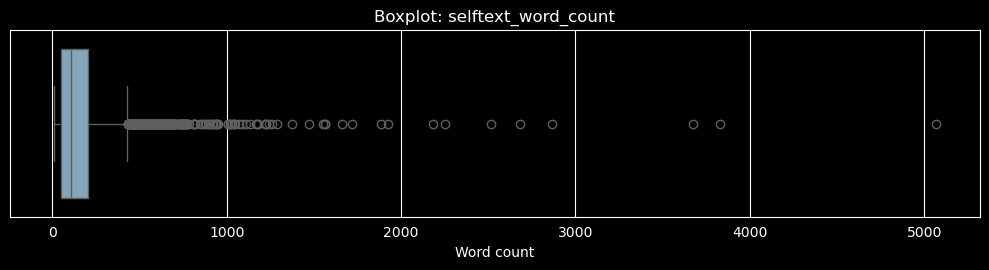

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wc_col = "selftext_word_count"
s_wc = pd.to_numeric(df_human_reddit_posts_2[wc_col], errors="coerce").dropna().astype(int)

desc_wc = s_wc.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).to_frame(name=wc_col)
display(desc_wc)

q1, q3 = s_wc.quantile([0.25, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

print(f"Q1={q1:.2f} | Q3={q3:.2f} | IQR={iqr:.2f}")
print(f"Lower fence={lower_fence:.2f} | Upper fence={upper_fence:.2f}")

plt.figure(figsize=(10, 2.8))
sns.boxplot(x=s_wc, color="#7aa6c2")
plt.title("Boxplot: selftext_word_count")
plt.xlabel("Word count")
plt.tight_layout()
plt.show()

In [50]:
mask_outliers = (df_human_reddit_posts_2[wc_col] < lower_fence) | (df_human_reddit_posts_2[wc_col] > upper_fence)

df_selftext_word_count_outliers = (
    df_human_reddit_posts_2.loc[mask_outliers, ["id", "subreddit", "author", "title", "permalink", wc_col, "selftext"]]
    .copy()
    .assign(selftext_preview=lambda d: d["selftext"].astype(str).str.replace(r"\s+", " ", regex=True).str.slice(0, 300))
    .drop(columns=["selftext"])
    .sort_values(wc_col, ascending=False)
    .reset_index(drop=True)
)

print(
    f"Outliers (IQR rule): {len(df_selftext_word_count_outliers):,} / {len(df_human_reddit_posts_2):,} ({len(df_selftext_word_count_outliers) / len(df_human_reddit_posts_2):.2%})")
display(df_selftext_word_count_outliers)


Outliers (IQR rule): 308 / 4,177 (7.37%)


,id,subreddit,author,title,permalink,selftext_word_count,selftext_preview
0,1qinykc,loneliness,Straight_Ad4658,What do you do when hollowness is your baseline?,https://reddit.com/r/loneliness/comments/1qiny...,5067,I am a 33 year old man. Grew up in small town ...
1,1qn3gv1,loneliness,Nobody6701,Self belief.,https://reddit.com/r/loneliness/comments/1qn3g...,3828,"Before reading this, I need to preface that I ..."
2,1mlkbn2,alone,Front_Huckleberry_27,How do I handle being mixed and feeling alone ...,https://reddit.com/r/alone/comments/1mlkbn2/ho...,3673,Please don't be mean about how long it is. If ...
3,1lp86hk,SelfHate,FlowerEmerald,"Long rant, how truly bad must I be? To be told...",https://reddit.com/r/SelfHate/comments/1lp86hk...,2868,"I feel such disgust....my mother doesn't know,..."
4,1qupn3g,alone,Jhemmii,I’m tired,https://reddit.com/r/alone/comments/1qupn3g/im...,2680,"I’m just so tired of everything mentally, phys..."
...,...,...,...,...,...,...,...
303,tnbnue,loner,Yunokowo,Should I avoid people flat out,https://reddit.com/r/loner/comments/tnbnue/sho...,437,"I was diagnosed with depression, anxiety, and ..."
304,1hl6ijv,SelfHate,None,Told ChatGPT to give me a reality check,https://reddit.com/r/SelfHate/comments/1hl6ijv...,436,"I put in all the shit things that I've done, t..."
305,1inm9je,SelfHate,Tsukinoyo_,Is life worth giving up,https://reddit.com/r/SelfHate/comments/1inm9je...,434,"I'm sorry, I know the title seems really click..."
306,1krh46d,SelfHate,jssxd_29,I'm a loser,https://reddit.com/r/SelfHate/comments/1krh46d...,434,"18F, diagnosed late with autism at 16. I've be..."


## Remove `selftext_word_count` outliers from `df_human_reddit_posts_2` (IQR rule) by slicing the DataFrame to keep only rows within `[lower_fence, upper_fence]`.

In [51]:
# Keep only non-outlier rows (within IQR fences) and reset index
before_rows = len(df_human_reddit_posts_2)

mask_inliers = (~mask_outliers) & df_human_reddit_posts_2[wc_col].notna()
df_human_reddit_posts_2_no_outliers = df_human_reddit_posts_2.loc[mask_inliers].copy().reset_index(drop=True)

after_rows = len(df_human_reddit_posts_2_no_outliers)

print(f"Rows before: {before_rows:,}")
print(f"Outliers removed: {(~mask_inliers).sum():,}")
print(f"Rows after (no outliers): {after_rows:,} ({after_rows / before_rows:.2%})")

df_human_reddit_posts_2_no_outliers

Rows before: 4,177
Outliers removed: 308
Rows after (no outliers): 3,869 (92.63%)


,id,subreddit,created_utc,created_utc_datetime,author,title,selftext,selftext_word_count,score,num_comments,url,permalink,over_18,removed_by_category,source_file,language
0,gdwa47,LONERSNEEDLOVE,1588679278,2020-05-05 11:47:58+00:00,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,20,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
1,54n8m0,LONERSNEEDLOVE,1474927737,2016-09-26 22:08:57+00:00,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,13,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
2,2867n8,LONERSNEEDLOVE,1402796469,2014-06-15 01:41:09+00:00,Brockiscool,Welcome,This is my attempt to gather lonely people in ...,15,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
3,t3ytpc,LonelyAndUnsocialClub,1646107472,2022-03-01 04:04:32+00:00,crmatter,I'm very lost,I don't really understand how I'm feeling late...,423,19,3,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
4,t1f369,LonelyAndUnsocialClub,1645824642,2022-02-25 21:30:42+00:00,BullfrogAble4942,I feel really lonely and have a hard time find...,This is the first time I make a post on Reddit...,226,14,6,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,1qqun04,lonely,1769744772,2026-01-30 03:46:12+00:00,Whole_Intention_7949,Has anyone just...... always felt lonely even ...,I cut off both my friends a few days ago due t...,95,3,1,https://www.reddit.com/r/lonely/comments/1qqun...,https://reddit.com/r/lonely/comments/1qqun04/h...,False,None,../data/ph1/new_1000_lonely_20260209_183936/ra...,en
3865,1qsap9f,loneliness,1769885436,2026-01-31 18:50:36+00:00,AdSimple2026,Vent I guess,I'm just so tired of feeling like I have no on...,371,1,5,https://www.reddit.com/r/loneliness/comments/1...,https://reddit.com/r/loneliness/comments/1qsap...,False,None,../data/ph1/new_1000_loneliness_20260209_18385...,en
3866,1qte5fg,lonely,1769987793,2026-02-01 23:16:33+00:00,chusaychusay,I feel lonely because relationships/friendship...,I feel thats the main obstacle. I have no prob...,102,4,1,https://www.reddit.com/r/lonely/comments/1qte5...,https://reddit.com/r/lonely/comments/1qte5fg/i...,False,None,../data/ph1/new_1000_lonely_20260209_183936/ra...,en
3867,1qvki03,loneliness,1770198925,2026-02-04 09:55:25+00:00,Alternative-Goal-910,I want to be a person of a shadow,I’m always the last person invited. I’m always...,74,0,2,https://www.reddit.com/r/loneliness/comments/1...,https://reddit.com/r/loneliness/comments/1qvki...,False,None,../data/ph1/new_1000_loneliness_20260209_18385...,en


,selftext_word_count_no_outliers
count,3869.000000
mean,123.639183
std,96.381441
min,10.000000
1%,11.680000
5%,17.000000
10%,25.000000
25%,48.000000
50%,96.000000
75%,173.000000


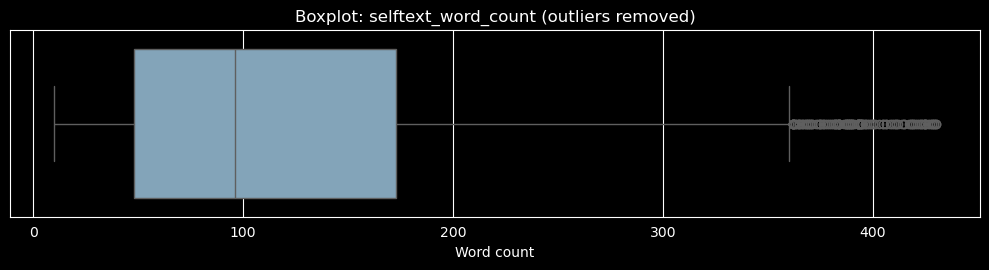

In [52]:
# Quick check: new descriptive stats + boxplot after removing outliers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s_wc_no = pd.to_numeric(df_human_reddit_posts_2_no_outliers[wc_col], errors="coerce").dropna().astype(int)

display(s_wc_no.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).to_frame(
    name=f"{wc_col}_no_outliers"))

plt.figure(figsize=(10, 2.8))
sns.boxplot(x=s_wc_no, color="#7aa6c2")
plt.title("Boxplot: selftext_word_count (outliers removed)")
plt.xlabel("Word count")
plt.tight_layout()
plt.show()


## Export `df_human_reddit_posts_2_no_outliers` to the `human_reddit_posts_no_outliers.ndjson` file
Export the already-created DataFrame `df_human_reddit_posts_2_no_outliers` (human Reddit posts with `selftext_word_count` outliers removed) to a newline-delimited JSON file at `../data/ph2/human_reddit_posts_2_no_outliers.ndjson`, with one record per line.

In [53]:
from pathlib import Path

out_dir = Path("../data/ph2")
out_dir.mkdir(parents=True, exist_ok=True)

ndjson_no_outliers_path = out_dir / "human_reddit_posts_2_no_outliers.ndjson"

df_human_reddit_posts_2_no_outliers.to_json(
    ndjson_no_outliers_path,
    orient="records",
    lines=True,
    force_ascii=False,
    date_format="iso",
)

print(ndjson_no_outliers_path)
print(
    f"Rows exported: {len(df_human_reddit_posts_2_no_outliers):,} | Columns: {df_human_reddit_posts_2_no_outliers.shape[1]:,}")


../data/ph2/human_reddit_posts_2_no_outliers.ndjson
Rows exported: 3,869 | Columns: 16


## Convert the `human_reddit_posts_2_no_outliers.ndjson` to `human_reddit_posts_2_no_outliers.xlsx`
Read `../data/ph2/human_reddit_posts_2_no_outliers.ndjson` (newline-delimited JSON; 1 record per line) into a pandas DataFrame, then export it as a single-sheet Excel file `../data/ph2/human_reddit_posts_2_no_outliers.xlsx`.

In [54]:
from pathlib import Path
import pandas as pd

in_path = Path("../data/ph2/human_reddit_posts_2_no_outliers.ndjson")
out_path = Path("../data/ph2/human_reddit_posts_2_no_outliers.xlsx")

df_no_outliers = pd.read_json(in_path, lines=True)

out_path.parent.mkdir(parents=True, exist_ok=True)
df_no_outliers.to_excel(out_path, index=False, sheet_name="posts")

print(in_path)
print(out_path)
print(f"Rows exported: {len(df_no_outliers):,} | Columns: {df_no_outliers.shape[1]:,}")
df_no_outliers.head()


../data/ph2/human_reddit_posts_2_no_outliers.ndjson
../data/ph2/human_reddit_posts_2_no_outliers.xlsx
Rows exported: 3,869 | Columns: 16


,id,subreddit,created_utc,created_utc_datetime,author,title,selftext,selftext_word_count,score,num_comments,url,permalink,over_18,removed_by_category,source_file,language
0,gdwa47,LONERSNEEDLOVE,1588679278,2020-05-05T11:47:58.000Z,RedditUser840,Heyloo,Hey just seeing if anyone (ANYONE) would wanna...,20,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/g...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
1,54n8m0,LONERSNEEDLOVE,1474927737,2016-09-26T22:08:57.000Z,Living-Ghost,So sad that people don't go on this subreddit,People need to show some love and compassion. ...,13,7,3,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/5...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
2,2867n8,LONERSNEEDLOVE,1402796469,2014-06-15T01:41:09.000Z,Brockiscool,Welcome,This is my attempt to gather lonely people in ...,15,1,0,https://www.reddit.com/r/LONERSNEEDLOVE/commen...,https://reddit.com/r/LONERSNEEDLOVE/comments/2...,False,None,../data/ph1/new_1000_LONERSNEEDLOVE_20260209_1...,en
3,t3ytpc,LonelyAndUnsocialClub,1646107472,2022-03-01T04:04:32.000Z,crmatter,I'm very lost,I don't really understand how I'm feeling late...,423,19,3,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
4,t1f369,LonelyAndUnsocialClub,1645824642,2022-02-25T21:30:42.000Z,BullfrogAble4942,I feel really lonely and have a hard time find...,This is the first time I make a post on Reddit...,226,14,6,https://www.reddit.com/r/LonelyAndUnsocialClub...,https://reddit.com/r/LonelyAndUnsocialClub/com...,False,None,../data/ph1/new_1000_LonelyAndUnsocialClub_202...,en
